# Moment generating function (MGF)

$$
M_X(t) = E[e^{tX}]= \left\{
                \begin{array}{ll}
                  \sum_{R(X)} g_X(x)  e^{tx},\ X \text{: discrete rvs,} \\
                  \int_{R(X)} [f_X(x)  e^{tx}] dx,\ X \text{: continuous rvs.}
                \end{array}
              \right.
$$

Using the MGF, we can get the moments of the random variable $X$, $E[X^n]$, deriving the function $n$ times and evaluating for $t=0$.

$$
E[X] = M_x'(t=0)
$$

$$
E[X^2] = M_x''(t=0)
$$

$$
E[X^n] = M_x^n(t=0)
$$

Thus, we can use the MGF to calculate the expected value and variance of $X$.

### MGF determines the distribution

The MGF of a random variable determines its distribution: if two r.v.s have the same MGF, they must have
the same distribution.

### Sum of independent random variables

If $X$ and $Y$ are independent,
then the MGF of $X + Y$ is the product of the individual MGFs:

$$
M_{X+Y}(t) = M_X(t)M_Y(t).
$$

This is true because if $X$ and $Y$ are independent, then $E[e^{t(X+Y)}] = E[e^{tX}]E[e^{tY}]$.

We can extend this to $n$ variables:

$$W = X_1 + X_n + \cdots + X_n,$$ then

$$
M_W(t) = E[e^{tW}] = E[e^{t(X_1+X_2+\cdots + X_n)}] = E[e^{tX_1}]E[e^{tX_2}] \cdots E[e^{tX_n}]
$$

$$
M_W(t) = M_{X_1}(t) M_{X_2}(t) \dots M_{X_n}(t) 
$$

### Sum of independent normal random variables

If we have a collection of independent normal r.v.s. $X_1 + X_2 + \cdots + X_n$, with $X_i \sim N(\mu_i, \sigma_i^2)$. Then the distribution of $W = X_1 + X_2 + \cdots + X_n$, is


$$
W \sim N \left(\sum \mu_i, \sum \sigma_i^2 \right).
$$


**Proof**

The moment generating function of a random variable $X \sim N(\mu, \sigma^2)$ is $M_X(t) = e^{t \mu + 1/2 \sigma^2 t^2}$.

$$
M_W(t) = M_{X_1}(t) M_{X_2}(t) \dots M_{X_n}(t) 
$$

$$
M_W(t) = [e^{t \mu_1 + 1/2 \sigma_1^2 t^2}] [e^{t \mu_2 + 1/2 \sigma_2^2 t^2}] \cdots [e^{t \mu_n + 1/2 \sigma_n^2 t^2}]
$$ 

$$
M_W(t) = e^{t(\mu_1 + \mu_2 + \cdots + \mu_n) + 1/2 t^2 (\sigma_1^2 + \sigma_2^2 + \cdots + \sigma_n^2) }
$$

The last expression corresponds to the MGF of a normal distribution, and given that the MGF determines the distribution, we have that 
$$W \sim N (\mu_1 + \mu_2 + \cdots + \mu_n, \sigma_1^2 + \sigma_2^2 + \cdots + \sigma_n^2).$$

In general if $W = \sum a_i X_i$, we have:

$$
W \sim N \left(\sum a_i \mu_i, \sum a_i^2 \sigma_i^2 \right).
$$

### Central limit theorem

If we have a collection of i.i.d. normal r.v.s. $X_1 + X_2 + \cdots + X_n$, with $X_i \sim N(\mu, \sigma^2)$.

Then for a $n$ large enough we have:

$$
\sum X_i \sim N(n \mu, n \sigma^2) \Rightarrow \frac{\sum X_i - n \mu}{\sigma \sqrt{n}} \sim N(0,1)
$$

$$
\bar{X} = \frac{\sum X_i}{n}  \sim N(\mu, \sigma^2 / n) \Rightarrow \frac{\bar{X} - \mu}{ \sigma / \sqrt{n}} \sim N(0,1)
$$

/home/salva/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


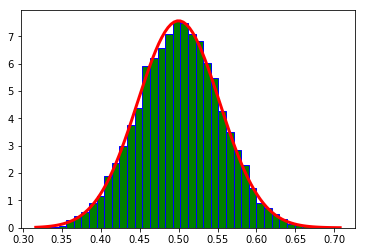

In [1]:
# -*- coding: utf-8 -*-
"""
@author: ms.gonzalez

Simulación del Teorema del Límite Central
"""
# Importación de librerías
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform
from scipy.stats import norm

size = 10000
n = 30

a, b = 0, 1
m = (a+b)/2
v = (b-a)**2 / (12 * n)

U = uniform.rvs(a, b-a, size=(size,n))  # uniform rvs
Um = np.mean(U, axis=1)  # mean of sample of size n

x = np.linspace(min(Um), max(Um), 100)  # normal rvs support
fx = norm.pdf(x, m, np.sqrt(v))  # evaluate normal pdf

plt.hist(Um, bins=40, normed=True, facecolor='green', edgecolor='blue')
plt.plot(x, fx, '-r', linewidth=3)
plt.show()

/home/salva/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


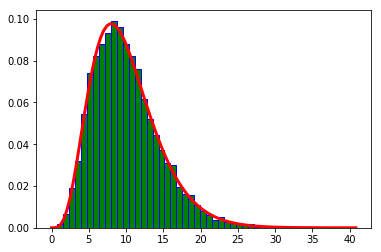

In [2]:
# chi-cuadrado

size = 10000
nz = 10
Z = norm.rvs(size=(size, nz))
Z2 = Z**2

sum_Z2 = np.sum(Z2, axis=1)
plt.hist(sum_Z2, bins=50, normed=True, facecolor='green', edgecolor='blue')

# Let's plot the theoretical pdf
from scipy.stats import chi2

x = np.linspace(0, max(sum_Z2), 100)
fx = chi2.pdf(x, nz)
plt.plot(x, fx, '-r', linewidth=3)
plt.show()

/home/salva/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


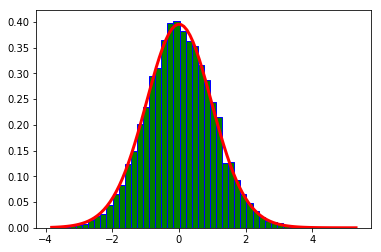

In [3]:
# t-student

size = 10000
nz = 30

Z1 = norm.rvs(size=size)

Z = norm.rvs(size=(size, nz))
Z2 = Z**2

sum_Z2 = np.sum(Z2, axis=1)

T = Z1 / np.sqrt(sum_Z2 / nz)

plt.hist(T, bins=50, normed=True, facecolor='green', edgecolor='blue')

# Let's plot the theoretical pdf

from scipy.stats import t

x = np.linspace(min(T), max(T), 100)
fx = t.pdf(x, nz)
plt.plot(x, fx, '-r', linewidth=3)

plt.show()

/home/salva/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


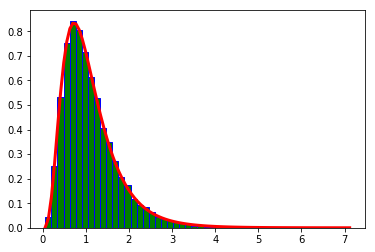

In [4]:
# F distribution

size = 10000
n1 = 10
Z = norm.rvs(size=(size, n1))
Z2 = Z**2

chi2_n1 = np.sum(Z2, axis=1)  # chi2 with n1 deg of freedom 

n2 = 20
Z = norm.rvs(size=(size, n2))
Z2 = Z**2

chi2_n2 = np.sum(Z2, axis=1)  # chi2 with n2 deg of freedom 

W = (chi2_n1 / n1) / (chi2_n2 / n2)

plt.hist(W, bins=50, normed=True, facecolor='green', edgecolor='blue')

# Let's plot the theoretical pdf

from scipy.stats import f

x = np.linspace(min(W), max(W), 100)
fx = f.pdf(x, n1, n2)
plt.plot(x, fx, '-r', linewidth=3)

plt.show()

Si $X$ y $Y$ son dos variable aleatorias distribuidas como
$$
X \sim \mathcal{N}\left(\mu_X, \sigma_X^2\right) \textrm{ y } 
Y \sim \mathcal{N}\left(\mu_Y, \sigma_Y^2\right),
$$ 
y se seleccionan dos muestras aleatorias 
$X_1,X_2,\dots,X_n$ y $Y_1,Y_2,\dots,Y_m$, 
determine la distribución de probabilidad de 
los siguientes estadísticos (marcados en negrita):

---

\begin{equation}
    \boldsymbol{\frac{\bar{X} - \mu_X}{\sigma_X / \sqrt n}} \sim \mathcal{N}(0,1).\quad (1)
\end{equation}

Sabemos que v.a. $\bar{X}$ (media muestral)
está distribuida como $\bar{X}\sim \mathcal{N}\left(\mu_X, \frac{\sigma_X^2}{n}\right)$.
Al normalizar para parámetros conocidos de la población,
es decir, restar la media $\mu$ y dividir por la desviación 
$\sqrt{\frac{\sigma_X^2}{n}}$, tenemos la expresión en la Ec. (1).

---

\begin{equation}
    \boldsymbol{(n-1)\frac{S_X^2}{\sigma_X^2}} \sim \chi^2_{(n-1)}.\quad (2)
\end{equation}

$$
\sum_{i=1}^n(X_i - \mu)^2  = \sum_{i=1}^n[(X_i - \bar{X}) + (\bar{X} - \mu)]^2
$$
$$
 = \sum_{i=1}^n(X_i - \bar{X})^2 + \sum_{i=1}^n(\bar{X} - \mu)^2 + 2(\bar{X} - \mu)\sum_{i=1}^n(X_i - \bar{X})
$$
$$
 = \sum_{i=1}^n(X_i - \bar{X})^2 + n(\bar{X} - \mu)^2
$$

Partimos de sumar y restar $\bar{X}$, es decir hemos suamdo cero,
por lo que ambas expresiones de la igualdad son equivalentes.
Luego descomponemos la expresión resultante como se muestra en la segunda línea.
El término $\sum_{i=1}^n(X_i - \bar{X})$ es igual a cero, 
y la sumatoria en el segundo término es una suma constante,
por lo tanto es igual a $n$ veces $(\bar{X} - \mu)^2$. 
Partimos de la expresión obtenida arriba, 
$$
\sum_{i=1}^n(X_i - \mu)^2 
 = \sum_{i=1}^n(X_i - \bar{X})^2 + n(\bar{X} - \mu)^2.
$$
dividimos 
cada término de la igualdad entre $\sigma^2$ y 
sustituimos $\sum_{i=1}^n(X_i - \bar{X})^2$ por $(n - 1)S^2$.
Esto último proviene de despejar de la definición
del estimador insesgado de la varianza
muestral $S^2 = \frac{1}{n-1}\sum_{i=1}^n(X_i - \bar{X})^2$.

El resulado es:

$$
\frac{1}{\sigma^2}\sum_{i=1}^n(X_i - \mu)^2 = 
\frac{(n - 1)S^2}{\sigma^2} + 
\frac{(\bar{X} - \mu)^2}{\sigma^2/n}.
$$

Note que el término en rojo está distribuido como
$\frac{1}{\sigma^2}\sum_{i=1}^n(X_i - \mu)^2 \sim \chi^2_{(n)}$.
El término en verde está distribuido como 
$\frac{(\bar{X} - \mu)^2}{\sigma^2/n} \sim \chi^2_{(1)}$.
Recuerde que $Z_1^2 + Z_2^2 + \dots + Z_n^2 \sim \chi^2_{(n)}$, donde $Z\sim \mathcal{N}(0,1)$.
Sabemos que $W = \sum_{i=1}^n W_i = \chi^2_{(\sum \nu_i)}$, con $W_i \sim \chi^2_{(\nu_i)}$, 
por tanto al despejar $\frac{(n - 1)S^2}{\sigma^2}$ resulta la expresión en la Ec. (2).

---

\begin{equation}
    \boldsymbol{\frac{\bar{X}-\mu_X}{S_X/\sqrt{n}}} \sim t_{(n-1)}.\quad (3)
\end{equation}

Tenemos que 
$$
U=(n-1)\frac{S_X^2}{\sigma_X^2} \sim \chi^2_{(\nu=n-1)},\quad 
Z=\frac{\bar{X} - \mu_X}{\sigma_X / \sqrt n} \sim \mathcal{N}(0,1).
$$
Usando la definición de la variable aleatoria 
$$T=\frac{Z}{\sqrt{U/\nu}}\sim t_{\nu},$$
donde $\nu$ son los grados de libertad de la distribución,
comprobamos la expresión de la Ec. (3) a continuación:

$$
T=\frac{Z}{\sqrt{U/\nu}} \\
=\frac{\frac{\bar{X} - \mu_X}{\sigma_X / \sqrt n}}{\sqrt{\frac{(n-1)\frac{S_X^2}{\sigma_X^2}}{n-1}}}
=\frac{\frac{\bar{X} - \mu_X}{\sigma_X / \sqrt n}}{\sqrt{\frac{S_X^2}{\sigma_X^2}}}
=\frac{\frac{\bar{X} - \mu_X}{\sigma_X / \sqrt n}}{\frac{S_X}{\sigma_X}}
$$

$$
=\frac{\bar{X} - \mu_X}{S_X / \sqrt n} \sim t_{(n-1)}.
$$

---

\begin{equation}
    \boldsymbol{\frac{S_Y^2 \sigma_X^2}{S_X^2 \sigma_Y^2}}
    \sim F_{(\omega=m-1, \nu=n-1)}.\quad (4)
    \end{equation}

Tenemos que 
$$
U=(m-1)\frac{S_Y^2}{\sigma_Y^2} \sim \chi^2_{(\omega=m-1)},\
V=(n-1)\frac{S_X^2}{\sigma_X^2} \sim \chi^2_{(\nu=n-1)}.
$$
De la definición de la v.a. $W = \frac{U/\omega}{V/\nu} \sim F(\omega, \nu)$,
comporbamos la expresión de la Ec. (4):

$$
W = \frac{U/\omega}{V/\nu} 
$$

$$
= \frac{\frac{(m-1)\frac{S_Y^2}{\sigma_Y^2}}{m-1}}
{\frac{(n-1)\frac{S_X^2}{\sigma_X^2}}{n-1}} = 
\frac{\frac{S_Y^2}{\sigma_Y^2}}{\frac{S_X^2}{\sigma_X^2}}
= \frac{S_Y^2 \sigma_X^2}{S_X^2 \sigma_Y^2} \sim F_{(\omega=m-1, \nu=n-1)}.
$$


- Ver __[resumen de fórmulas](https://drive.google.com/open?id=13UyYrWb4MtYr2vJpSnvZWyETH1mW360W)__ para construir intevalos de confianza.

- Ver __[resumen de fórmulas](https://drive.google.com/open?id=1C6Wq9MOQGWNzBwCK8w-DB5NnsY_Mn4Lv)__ para pruebas de hipótesis.

### Simulation of sample proportion of successful trials $\bar{X}$, $n \bar{X} \sim bin(n, p)$

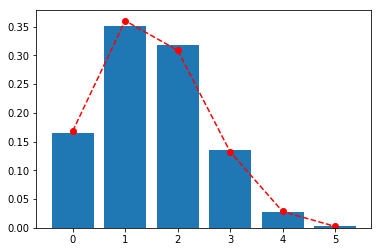

In [5]:
from scipy.stats import binom

size = 10000
n = 5

prob = 0.3

X = binom.rvs(1, prob, size=(size, n))  # Sum of bernoulli distributions

estX = np.mean(X, axis=1)*n 

unique, counts = np.unique(estX, return_counts=True)
plt.bar(unique, counts / size)
plt.plot(unique, binom.pmf(unique, n, prob), '--ro')
plt.show()

### Sampling distribution of difference between sample means, $\bar {X}_{1}-\bar {X}_{2}$￼

/home/salva/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


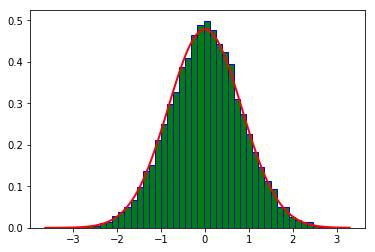

In [6]:
m1, m2 = 0, 0
v1, v2 = 1, 4
n1, n2 = 4, 9

size = 10000

X1 = norm.rvs(loc=m1, scale=np.sqrt(v1), size=(size, n1))

X2 = norm.rvs(loc=m2, scale=np.sqrt(v2), size=(size, n2))

mX1 = np.mean(X1, axis=1)
mX2 = np.mean(X2, axis=1)

dX = mX1 - mX2

plt.hist(dX, bins=50, normed=True, facecolor='green', edgecolor='blue')

xn = np.linspace(min(dX), max(dX), 100)

mn = m1 - m2
sn = np.sqrt(v1/n1 + v2/n2)
fxn = norm.pdf(xn, mn, sn)
plt.plot(xn, fxn, 'r', linewidth=2)
plt.show()

### Distribution of sample variance

/home/salva/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


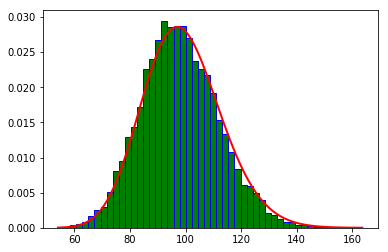

In [7]:
m, v = 0, 1

size = 10000 
n = 100

X = norm.rvs(loc=m, scale=np.sqrt(v), size=(size, n))

vX = np.var(X, axis=1)

vX = (n-1) * vX / v

plt.hist(vX, bins=50, normed=True, facecolor='green', edgecolor='blue')

x = np.linspace(min(vX), max(vX), 100)

fx = chi2.pdf(x, n-1)
plt.plot(x, fx, 'r', linewidth=2)
plt.show()

### Simulation of confidence intervals

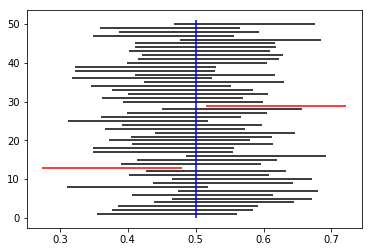

The true mean is in the interval 96.0 % of the time.


In [8]:
size = 50
n = 30

a, b = 0, 1
m = (a+b)/2
v = (b-a)**2 / 12

U = uniform.rvs(a, b-a, size=(size,n))  # uniform rvs
Um = np.mean(U, axis=1)  # mean of sample of size n

ICU = Um + norm.ppf(0.975)*np.sqrt(v / n)
ICL = Um - norm.ppf(0.975)*np.sqrt(v / n)

ci = np.vstack([ICL, ICU]).transpose()
cont = np.where(np.logical_and(ci[:,0]<0.5, ci[:,1]>0.5))[0]

for pos,limits in enumerate(ci):
    if pos in cont:
        col = 'k'
    else:
        col = 'r'
    plt.hlines(pos+1, limits[0], limits[1], colors=col)

plt.vlines(m, 0, size+1, colors='b')
plt.show()

# Let's count how many times the interval contains the true mean
print("The true mean is in the interval", np.shape(cont)[0]/size*100, "% of the time.")

### Population mean point estimation: sample mean vs. sample median

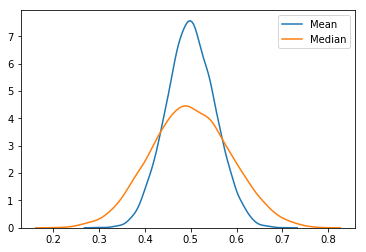

In [9]:
import pandas as pd
import seaborn as sns

size = 10000
n = 30

U = uniform.rvs(a, b-a, size=(size,n))  # uniform rvs
Um = np.mean(U, axis=1)
Umed = np.median(U, axis=1)

sns.kdeplot(Um, label="Mean")
sns.kdeplot(Umed, label="Median")
plt.legend()
plt.show()

- What can you conclude of the point estimators above?
    - Are both centered?
    - Which one has minimum variance?

## Examples:

1.A random sample of 16 Americans yielded the following data on the number of pounds of beef consumed per year:

    118    115    125    110    112    130    117    112

    115    120    113    118    119    122    123    126

    - What is the average number of pounds of beef consumed each year per person in the United States? To help answer the question, calculate a 95% confidence interval for the mean. 


2.Boys of a certain age are known to have a mean weight of $\mu = 85$ pounds. A complaint is made that the boys living in a municipal children's home are underfed. As one bit of evidence, $n = 25$ boys (of the same age) are weighed and found to have a mean weight of 
$\bar{X} = 80.94$ pounds. It is known that the population standard deviation $\sigma$ is 11.6 pounds (the unrealistic part of this example!). Based on the available data, what should be concluded concerning the complaint?

- Sources:
    - https://newonlinecourses.science.psu.edu/stat414/node/289/
    - https://newonlinecourses.science.psu.edu/stat414/node/290/